# INFO 3402 – Class 14: Missing data

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT)  

In [1]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

We'll use the famous Titantic passenger dataset.

* **pclass**: categorical, what class was the passenger traveling in
* **survived**: binary, whether the passenger survived
* **name**: string, the name of the passenger
* **sex**: categorical, the sex of the passenger
* **age**: integer, the age of the passenger
* **sibsp**: integer, number of siblings and/or spouse aboard
* **parch**: integer, number of parents and/or children aboard
* **ticket**: string, ticket number
* **fare**: float, passenger fare paid
* **cabin**: string, cabin number
* **embarked**: categorical, C=Cherbourg (France), Q=Queenstown (Ireland), S=Southampton (England)
* **boat**: categorical, boat number the passenger escaped on
* **body**: integer, identifier for the body
* **destination**: string, passenger's destination

![RMS Titanic voyage map](https://upload.wikimedia.org/wikipedia/commons/5/51/Titanic_voyage_map.png)

In [2]:
titanic_df = pd.read_csv('titanic.csv',dtype={'age':float})
titanic_df.rename(columns={'home.dest':'destination'},inplace=True)
print("There are {0:,} rows of data.".format(len(titanic_df)))
titanic_df.head(20)

There are 1,309 rows of data.


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


Which of the columns have missing data? Age will be easier to work with since there are fewer but enough missing values, these values are numeric, and we can hypothesize reasonable mechanisms for imputing age.

In [6]:
titanic_df.isnull().sum().sort_values(ascending=False)

body           1188
cabin          1014
boat            823
destination     564
age             263
embarked          2
fare              1
ticket            0
parch             0
sibsp             0
sex               0
name              0
survived          0
pclass            0
dtype: int64

What are some strategies for dealing with missing data? It depends on how and why the data is missing. There are at least three different reasons why data could be missing:

* **Missing at Random** (**MAR**): the probability for a data value to be missing is not related to the missing data, but it could be related to other observed data. *Example*: respondents stop answering survey questions out of fatigue. MAR is relatively common.
* **Missing Completely at Random** (**MCAR**): the probability for a data value to be missing has nothing to do with either its value or the values of other variables. *Example*: the data was stored in a file that was corrupted. MCAR is usually very rare.
* **Missing not at Random** (**MNAR**): the probability for a data value to be missing depends on its value or the value of other variables. *Example*: women are less likely to report their age than men. MNAR is probably the most common.

[Alvira Swalin](https://towardsdatascience.com/@aswalin)'s [tutorial](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4) describes a variety of strategies for different scenarios. The first decision is whethet to delete the missing data or not.

![How to Handle Missing Data](https://cdn-images-1.medium.com/max/1600/1*_RA3mCS30Pr0vUxbp25Yxw.png)

## Drop the data 

### Observations

The first option is to use `pandas`'s [`.dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) method to remove the observations that have missing data. If there are only a few missing observations, you should still have enough statistical power to make claims about the rest of the data in the sample. However, because MNAR and MAR are so common, the resulting sample will include biases.

In [7]:
titanic_age_nas_dropped_df = titanic_df.dropna(subset=['age'])
print("There are {0:,} rows of data after dropping, comared to {1:,} before.".format(len(titanic_age_nas_dropped_df),
                                                                                     len(titanic_df)))

There are 1,046 rows of data after dropping, comared to 1,309 before.


What are some examples of biases we have introduced by dropping observations?

Our population has gotten more female: 35.6% of the passengers in the full `titanic_df` are female but 37.1% of the passenger in the filtered `titanic_age_nas_dropped_df` are female. Men are apparently more likely to not have their ages reported in this data and thus the data is MNAR.

In [8]:
titanic_df['sex'].value_counts()/len(titanic_df)

male      0.644003
female    0.355997
Name: sex, dtype: float64

In [9]:
titanic_age_nas_dropped_df['sex'].value_counts()/len(titanic_age_nas_dropped_df)

male      0.629063
female    0.370937
Name: sex, dtype: float64

Dropping the missing values of age also made the distribution across passenger classes richer (24.7% to 27.1% in first class, 21.2% to 25.0% in second class, and 54.2% to 47.9% in third class). Thus, the missing age data appears to be much more likely among third class passengers and evidence of MNAR.

In [10]:
titanic_df['pclass'].value_counts().sort_index()/len(titanic_df)

1    0.246753
2    0.211612
3    0.541635
Name: pclass, dtype: float64

In [11]:
titanic_age_nas_dropped_df['pclass'].value_counts().sort_index()/len(titanic_age_nas_dropped_df)

1    0.271511
2    0.249522
3    0.478967
Name: pclass, dtype: float64

There are even differences in the distribution of where the age-less passengers embarked. I would hypothesize at this point that something about the age-recording of passengers was different for the passengers embarking at Queenstown.

In [12]:
titanic_df['embarked'].value_counts().sort_index()/len(titanic_df)

C    0.206264
Q    0.093965
S    0.698243
Name: embarked, dtype: float64

In [13]:
titanic_age_nas_dropped_df['embarked'].value_counts().sort_index()/len(titanic_age_nas_dropped_df)

C    0.202677
Q    0.047801
S    0.747610
Name: embarked, dtype: float64

### Variables

If you have a data set with multiple columns of data, some of which are missing a majority or nearly all their data, you can elect to drop those columns. In our case, something like the "body" column could be dropped since it has so many missing values.

In [14]:
titanic_cols_dropped_df = titanic_df.drop(columns=['body','boat','cabin'])
titanic_cols_dropped_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"


You could also use the `.dropna()` method to remove *all* the columns that contain *any* missing data.

In [15]:
titanic_column_nas_dropped_df = titanic_df.dropna(how='any',axis=1)
titanic_column_nas_dropped_df.head()

,pclass,survived,name,sex,sibsp,parch,ticket
0,1,1,"Allen, Miss. Elisabeth Walton",female,0,0,24160
1,1,1,"Allison, Master. Hudson Trevor",male,1,2,113781
2,1,0,"Allison, Miss. Helen Loraine",female,1,2,113781
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,1,2,113781
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1,2,113781


## Encode NAs with a consistent null value

The way `pandas` represents null values are as numpy NANs, which are floats. If the other data in the column are not floats, but are strings, integers, or booleans, then this could create headaches downstream in your data analysis.

The first option is to use `pandas`'s [`.fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) method to replace the NAs with an alternative value, ideally one that is consistent with the other values. In other words, if the values are categorical strings, then add a new categorical string for NA values.

Let's replace the NAN values under "body" with -1 so that its consistent with the other numbering.

In [16]:
titanic_df['body'].fillna(-1,inplace=True)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,-1.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,-1.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,-1.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,-1.0,"Montreal, PQ / Chesterville, ON"


If the the values are integers, add a new integer for the NA values like -1.

In [17]:
titanic_df['cabin'].fillna("None",inplace=True)
titanic_df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,-1.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,-1.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,-1.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,-1.0,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,-1.0,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,-1.0,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,-1.0,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,-1.0,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,None,C,NaN,22.0,"Montevideo, Uruguay"


## Fill the NAs with the mean/median value

Age is a value we want to be more careful about estimating its value. Replacing the NANs in "age" with a value of -1 will bias the distribution of ages for the entire sample.

Text(0, 0.5, 'Count')

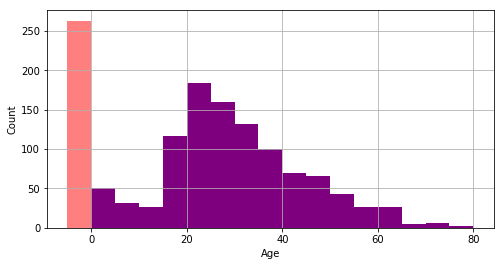

In [21]:
titanic_age_filled = titanic_df.fillna({'age':-1})

f,ax = plt.subplots(1,1,figsize=(8,4))

titanic_df['age'].hist(bins=np.arange(-5,85,5),ax=ax,color='b')
titanic_age_filled['age'].hist(bins=np.arange(-5,85,5),ax=ax,color='r',alpha=.5)
ax.set_xlabel('Age')
ax.set_ylabel('Count')

We could instead fill the missing values of age with the average of all ages. In other words, all the missing ages receive exactly the same value for age: the average age of everyone else: 29.9

In [22]:
titanic_df['age'].mean()

29.8811345124283

Text(0, 0.5, 'Count')

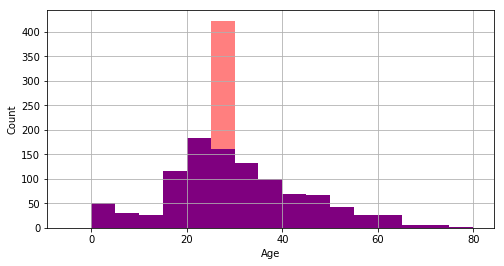

In [23]:
titanic_age_filled_mean = titanic_df.fillna({'age':titanic_df['age'].mean()})

f,ax = plt.subplots(1,1,figsize=(8,4))

titanic_df['age'].hist(bins=np.arange(-5,85,5),ax=ax,color='b')
titanic_age_filled_mean['age'].hist(bins=np.arange(-5,85,5),ax=ax,color='r',alpha=.5)
ax.set_xlabel('Age')
ax.set_ylabel('Count')

## Impute the missing data

Since the data is MNAR, a more intelligent option is to impute the missing values based on the average age values of other passengers in the same class. First, use `pivot_table` (and `reset_index`) to make a tidy mini-DataFrame of the average age of passengers based on their class, where they embarked, and their sex.

In [24]:
avg_ages = pd.pivot_table(data=titanic_df,index=['pclass','embarked','sex'],values='age',aggfunc='mean').reset_index()
avg_ages

,pclass,embarked,sex,age
0,1,C,female,38.107692
1,1,C,male,40.047619
2,1,Q,female,35.000000
3,1,Q,male,44.000000
4,1,S,female,35.609375
5,1,S,male,41.705939
6,2,C,female,19.363636
7,2,C,male,27.269231
8,2,Q,female,30.000000
9,2,Q,male,53.750000


Because the data is MNAR, we can see substantial differences in the average age of passengers based on covariates like class, port, and gender. We can `merge` these two datasets together.

In [25]:
imputed_age_df = pd.merge(left=titanic_df,
                          right=avg_ages,
                          left_on=['pclass','embarked','sex'],
                          right_on=['pclass','embarked','sex'],
                          how='outer')

print("Is the length of the merged DataFrame the same as before?\t{}.".format(len(imputed_age_df) == len(titanic_df)))

imputed_age_df.rename(columns={'age_x':'age','age_y':'imputed_age'},inplace=True)
imputed_age_df['abs_age_error'] = (imputed_age_df['age'] - imputed_age_df['imputed_age']).apply(np.abs)

imputed_age_df['age']

imputed_age_df.head()

Is the length of the merged DataFrame the same as before?	True.


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,destination,imputed_age,abs_age_error
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,-1.0,"St Louis, MO",35.609375,6.609375
1,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,-1.0,"Montreal, PQ / Chesterville, ON",35.609375,33.609375
2,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,-1.0,"Montreal, PQ / Chesterville, ON",35.609375,10.609375
3,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,-1.0,"Hudson, NY",35.609375,27.390625
4,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,-1.0,"Bayside, Queens, NY",35.609375,17.390625


How were the errors in our imputed ages distributed?

In [26]:
pd.pivot_table(data=imputed_age_df.dropna(subset=['age']),
               index=['pclass','embarked','sex'],
               values='abs_age_error',
               aggfunc='mean')

abs_age_error
pclass embarked sex                  
1      C        female      10.970888
                male        12.368859
       Q        female       2.000000
                male         0.000000
       S        female      12.767090
                male        11.455652
2      C        female       7.719008
                male         6.207101
       Q        female       0.000000
                male         9.375000
       S        female      10.022400
                male        10.531982
3      C        female       9.239669
                male         7.396929
       Q        female       6.269841
                male        12.653061
       S        female       9.575120
                male         8.567014

Text(0, 0.5, 'Count')

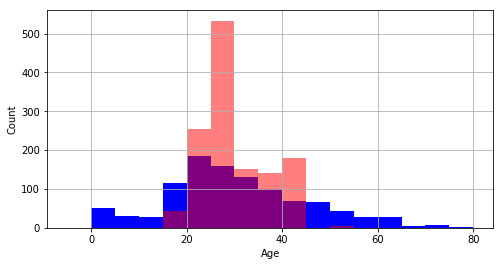

In [27]:
f,ax = plt.subplots(1,1,figsize=(8,4))

titanic_df['age'].hist(bins=np.arange(-5,85,5),ax=ax,color='b')
imputed_age_df['imputed_age'].hist(bins=np.arange(-5,85,5),ax=ax,color='r',alpha=.5)
ax.set_xlabel('Age')
ax.set_ylabel('Count')

Make a new column that has the true ages (if available) and otherwise the imputed ages.

In [28]:
imputed_age_df['true_and_imputed_ages'] = imputed_age_df['age']

c1 = imputed_age_df['true_and_imputed_ages'].isnull()
imputed_age_df.loc[c1,'true_and_imputed_ages'] = imputed_age_df.loc[c1,'imputed_age']

imputed_age_df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,destination,imputed_age,abs_age_error,true_and_imputed_ages
1304,3,0,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,None,Q,NaN,-1.0,NaN,26.738095,NaN,26.738095
1305,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,None,Q,NaN,-1.0,NaN,26.738095,NaN,26.738095
1306,3,0,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,None,Q,NaN,-1.0,NaN,26.738095,NaN,26.738095
1307,3,0,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,None,Q,NaN,-1.0,NaN,26.738095,NaN,26.738095
1308,3,0,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q,NaN,-1.0,NaN,26.738095,NaN,26.738095


Text(0, 0.5, 'Count')

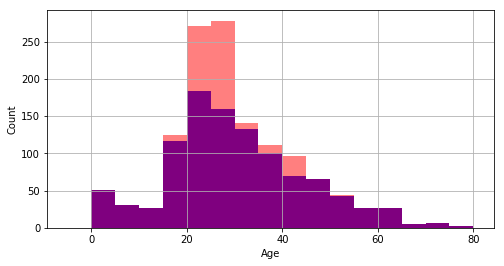

In [29]:
f,ax = plt.subplots(1,1,figsize=(8,4))

titanic_df['age'].hist(bins=np.arange(-5,85,5),ax=ax,color='b')
imputed_age_df['true_and_imputed_ages'].hist(bins=np.arange(-5,85,5),ax=ax,color='r',alpha=.5)
ax.set_xlabel('Age')
ax.set_ylabel('Count')

### Multiple regression

We can estimate a regression model predicting age as a function of "pclass", "sex", "embarked", "fare", "sibsp", and "parch". While we could use `scikit-learn` to do this linear regression, we'll instead use `statsmodels`'s [R-style formulas](https://www.statsmodels.org/stable/example_formulas.html). The `"C(pclass)"` notation refers to coding for [categorical variables](https://www.statsmodels.org/stable/example_formulas.html#categorical-variables).

In [30]:
# Import the library
import statsmodels.formula.api as smf

# Initialize the model
m = smf.ols(formula="age ~ C(pclass) + C(sex) + C(embarked) + fare + sibsp + parch",data=imputed_age_df)

# Fit the model
r = m.fit()

# Print out the model statistics
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     41.33
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.69e-57
Time:                        11:31:33   Log-Likelihood:                -4114.2
No. Observations:                1043   AIC:                             8246.
Df Residuals:                    1034   BIC:                             8291.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           38.6591      1.403  

Because the outcome variable is in years, we interpret the regression coefficients in units of years as well:

* `Intercept`: the average age of passengers before accounting for anything else is 38.6
* `C(pclass)[T.2]`: compared to passengers in first class, passengers in second class are on average 11.2 years younger. This effect is statistically significant.
* `C(pclass)[T.3]`: compared to passengers in first class, passengers in third class are on average 15.9 years younger. This effect is statistically significant.
* `C(sex)[T.male]`: compared to female passengers, male passengers are 2.7 years older on average. This effect is statistically significant.
* `C(embarked)[T.Q]`: compared to passengers who embarked at Cherbourg, passengers who embarked at Queenstown are 4.9 years older on average. This effect is marginally significant.
* `C(embarked)[T.S]`: compared to passengers who embarked at Cherbourg, passengers who embarked at Southampton are 2.3 years older on average. This effect is marginally significant.
* `fare`: Every additional (pound? I'm unsure what unit the fare is reported in) paid in fare reduces the age of the passenger by 0.0055 years (2 days). This effect is not statistically significant.
* `sibsp`: Every additional sibling or spouse reduced the age by 3.2 years on average. This effect is statistically significant.
* `parch`: Every additional parent or child reduced the age by 0.70 years on average. This effect is not statistically significant.

Our model performance is also adequate: the R-squared value is 0.242, or 24.2% of the observed variance is explained by our model.

A simple example of the relationship between "subsp" and "age":

/Users/briankeegan/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


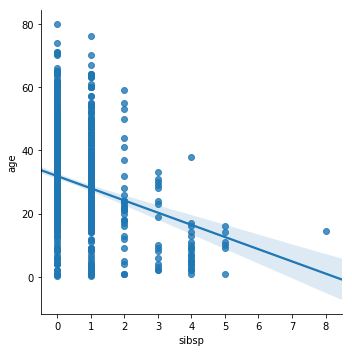

In [31]:
g = sb.lmplot(x='sibsp',y='age',data=imputed_age_df)

We can use this model to predict the ages of all passengers, including those with missing ages.

In [32]:
# Pass the DataFrame to use as predictions and store the predictions in a new columns
imputed_age_df['mr_imputed_age'] = r.predict(imputed_age_df)

# Create a new columns and copy the current ages
imputed_age_df['true_and_mr_imputed_ages'] = imputed_age_df['age']

# Identify the rows where there are null ages
c1 = imputed_age_df['true_and_mr_imputed_ages'].isnull()

# Replace the null ages with predicted ages
imputed_age_df.loc[c1,'true_and_mr_imputed_ages'] = imputed_age_df.loc[c1,'mr_imputed_age']

Plot the distribution of the observed ages in the data (blue), the simple matching imputated ages (red), and the multiple regression imputed ages (green). Both of the imputation methods put most of the passengers ages between 20 and 40, but ignore the tails of children and elders.

Text(0, 0.5, 'Count')

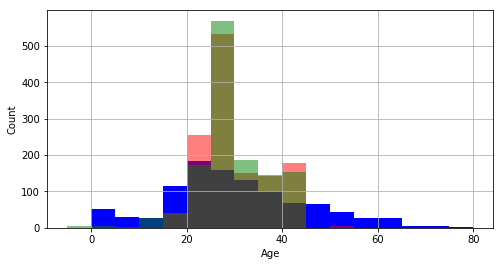

In [33]:
f,ax = plt.subplots(1,1,figsize=(8,4))

titanic_df['age'].hist(bins=np.arange(-5,85,5),ax=ax,color='b')
imputed_age_df['imputed_age'].hist(bins=np.arange(-5,85,5),ax=ax,color='r',alpha=.5)
imputed_age_df['mr_imputed_age'].hist(bins=np.arange(-5,85,5),ax=ax,color='g',alpha=.5)
ax.set_xlabel('Age')
ax.set_ylabel('Count')

The histogram above was if we only used the imputed ages for true ages, even if we had true ages. The histogram below plots the distribution of true ages (if they exist) and the imputed ages (if no age was available). Again there are strong peaks between the ages of 20 and 30 for the imputed data compared to the actual distribution.

Text(0, 0.5, 'Count')

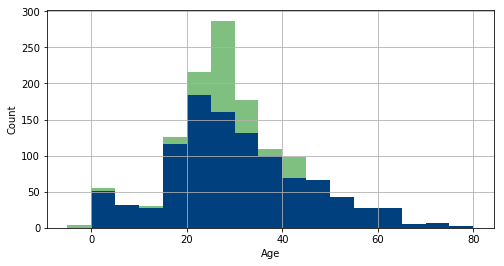

In [35]:
f,ax = plt.subplots(1,1,figsize=(8,4))

titanic_df['age'].hist(bins=np.arange(-5,85,5),ax=ax,color='b')
# imputed_age_df['true_and_imputed_ages'].hist(bins=np.arange(-5,85,5),ax=ax,color='r',alpha=.5)
imputed_age_df['true_and_mr_imputed_ages'].hist(bins=np.arange(-5,85,5),ax=ax,color='g',alpha=.5)
ax.set_xlabel('Age')
ax.set_ylabel('Count')

If you noticed, the green distribution for ages imputed by multiple regression returned some age estimates that were negative. This is because the multiple regression model subtracted 3.2 years from a passenger's estimated age for every sibling or spouse they were traveling with. If someone was traveling with many siblings, this could potentially cause the model to estimate them as having a negative age. In this case, the model found the [Sage family](https://www.encyclopedia-titanica.org/the-sage-family-of-peterborough.html) of 11 all traveled on the same ticket and none of them survived.

In [36]:
imputed_age_df[imputed_age_df['ticket'] == "CA. 2343"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,destination,imputed_age,abs_age_error,true_and_imputed_ages,mr_imputed_age,true_and_mr_imputed_ages
885,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,None,S,NaN,-1.0,NaN,26.146264,NaN,26.146264,0.575028,0.575028
886,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,None,S,NaN,67.0,NaN,26.146264,11.646264,14.500000,0.575028,14.500000
887,3,0,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,None,S,NaN,-1.0,NaN,26.146264,NaN,26.146264,0.575028,0.575028
888,3,0,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,None,S,NaN,-1.0,NaN,26.146264,NaN,26.146264,0.575028,0.575028
889,3,0,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,None,S,NaN,-1.0,NaN,26.146264,NaN,26.146264,0.575028,0.575028
890,3,0,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,None,S,NaN,-1.0,NaN,26.146264,NaN,26.146264,17.909110,17.909110
1069,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,None,S,NaN,-1.0,NaN,22.854740,NaN,22.854740,-2.155079,-2.155079
1070,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,None,S,NaN,-1.0,NaN,22.854740,NaN,22.854740,-2.155079,-2.155079
1071,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,None,S,NaN,-1.0,NaN,22.854740,NaN,22.854740,-2.155079,-2.155079
1072,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,None,S,NaN,-1.0,NaN,22.854740,NaN,22.854740,-2.155079,-2.155079


Who are these passengers our model estimated as having a negative age? It looks like four sisters: [Constance](https://www.encyclopedia-titanica.org/titanic-victim/constance-gladys-sage.html) (7 years), [Ada](https://www.encyclopedia-titanica.org/titanic-victim/elizabeth-ada-sage.html) (10 years), [Dorothy](https://www.encyclopedia-titanica.org/titanic-victim/dorothy-dolly-florence-sage.html) (14 years), and [Stella](https://www.encyclopedia-titanica.org/titanic-victim/stella-anne-sage.html) (20 years). The multiple regression model would effectively substract 24 years from the estimated ages of all these passengers, hence the negative predicted ages.

So this is an interesting and tragic example of the data not actually being missing (it exists on this online encylopedia), just having a low-quality data set!

In [37]:
imputed_age_df[imputed_age_df['true_and_mr_imputed_ages'] < 0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,destination,imputed_age,abs_age_error,true_and_imputed_ages,mr_imputed_age,true_and_mr_imputed_ages
1069,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,None,S,NaN,-1.0,NaN,22.85474,NaN,22.85474,-2.155079,-2.155079
1070,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,None,S,NaN,-1.0,NaN,22.85474,NaN,22.85474,-2.155079,-2.155079
1071,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,None,S,NaN,-1.0,NaN,22.85474,NaN,22.85474,-2.155079,-2.155079
1072,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,None,S,NaN,-1.0,NaN,22.85474,NaN,22.85474,-2.155079,-2.155079


## Time series data

I retrieved the revision history for the English Wikipedia article about the [Opportunity](https://en.wikipedia.org/wiki/Opportunity_(rover)) rover, whose mission ended on February 13, 2019 after almost 15 years.

This revision history data has been reindexed to cover every day between the first revision through February 18, 2019. You can see there are some null values in the data, but because this is time series data, we want to employ different methods for fixing them rather than simply dropping or filling them in the same way.

In [39]:
oppy_df = pd.read_csv('opportunity_wiki_revs.csv')
oppy_df.columns = ['date','revisions','users','length','diffs','last_revid']
oppy_df['date'] = pd.to_datetime(oppy_df['date'])
oppy_df.set_index('date',inplace=True)
oppy_df.head(10)

,revisions,users,length,diffs,last_revid
date,,,,,
2004-01-05,5.0,3.0,435.0,58.0,2103015.0
2004-01-06,NaN,NaN,NaN,NaN,NaN
2004-01-07,5.0,2.0,450.0,2.0,2124327.0
2004-01-08,NaN,NaN,NaN,NaN,NaN
2004-01-09,NaN,NaN,NaN,NaN,NaN
2004-01-10,3.0,2.0,498.0,20.0,2213742.0
2004-01-11,NaN,NaN,NaN,NaN,NaN
2004-01-12,NaN,NaN,NaN,NaN,NaN
2004-01-13,NaN,NaN,NaN,NaN,NaN


"revisions" is the number of revisions that were made to the article on that day. NaN values reflect days when no revisions occurred, so these missing values should be replaced by 0s.

In [40]:
oppy_df['revisions'].fillna(0,inplace=True)
oppy_df.head(10)

,revisions,users,length,diffs,last_revid
date,,,,,
2004-01-05,5.0,3.0,435.0,58.0,2103015.0
2004-01-06,0.0,NaN,NaN,NaN,NaN
2004-01-07,5.0,2.0,450.0,2.0,2124327.0
2004-01-08,0.0,NaN,NaN,NaN,NaN
2004-01-09,0.0,NaN,NaN,NaN,NaN
2004-01-10,3.0,2.0,498.0,20.0,2213742.0
2004-01-11,0.0,NaN,NaN,NaN,NaN
2004-01-12,0.0,NaN,NaN,NaN,NaN
2004-01-13,0.0,NaN,NaN,NaN,NaN


"users" is the number of unique users who edited the article on that data. NaN values reflect days when no revisions occurred, so these missing values should be replaced by 0s.

In [41]:
oppy_df['users'].fillna(0,inplace=True)
oppy_df.head(10)

,revisions,users,length,diffs,last_revid
date,,,,,
2004-01-05,5.0,3.0,435.0,58.0,2103015.0
2004-01-06,0.0,0.0,NaN,NaN,NaN
2004-01-07,5.0,2.0,450.0,2.0,2124327.0
2004-01-08,0.0,0.0,NaN,NaN,NaN
2004-01-09,0.0,0.0,NaN,NaN,NaN
2004-01-10,3.0,2.0,498.0,20.0,2213742.0
2004-01-11,0.0,0.0,NaN,NaN,NaN
2004-01-12,0.0,0.0,NaN,NaN,NaN
2004-01-13,0.0,0.0,NaN,NaN,NaN


"length" is the size of the article (in bytes). NaN values reflect days when no revisions occurred, ***but*** the size of the article was not 0 on those days: the size on that day was simply the size of the article the last time it was edited. This is an example of Last Observation Carried Forward (LOCF). Using `.fillna`, we pass the "ffill" method to "forward-fill" missing data with the last observed value.

In [42]:
oppy_df['length'].fillna(method='ffill',inplace=True)
oppy_df.head(10)

,revisions,users,length,diffs,last_revid
date,,,,,
2004-01-05,5.0,3.0,435.0,58.0,2103015.0
2004-01-06,0.0,0.0,435.0,NaN,NaN
2004-01-07,5.0,2.0,450.0,2.0,2124327.0
2004-01-08,0.0,0.0,450.0,NaN,NaN
2004-01-09,0.0,0.0,450.0,NaN,NaN
2004-01-10,3.0,2.0,498.0,20.0,2213742.0
2004-01-11,0.0,0.0,498.0,NaN,NaN
2004-01-12,0.0,0.0,498.0,NaN,NaN
2004-01-13,0.0,0.0,498.0,NaN,NaN


"diffs" is the median size of the differences introduced by revisions on that day. NaN values reflect days when no revisions occurred, so these missing valeus should be replaced by 0s.

In [43]:
oppy_df['diffs'].fillna(0,inplace=True)
oppy_df.head(10)

,revisions,users,length,diffs,last_revid
date,,,,,
2004-01-05,5.0,3.0,435.0,58.0,2103015.0
2004-01-06,0.0,0.0,435.0,0.0,NaN
2004-01-07,5.0,2.0,450.0,2.0,2124327.0
2004-01-08,0.0,0.0,450.0,0.0,NaN
2004-01-09,0.0,0.0,450.0,0.0,NaN
2004-01-10,3.0,2.0,498.0,20.0,2213742.0
2004-01-11,0.0,0.0,498.0,0.0,NaN
2004-01-12,0.0,0.0,498.0,0.0,NaN
2004-01-13,0.0,0.0,498.0,0.0,NaN


"last_revid" should be the last revision ID for the article on that date. In other words, it's the version of the article at the end of the day. NaN values reflect days when no revisions occurred, ***but*** the content of the article was not 0 on those days: the revision that day was simply the revision ID the last time the article was edited.

In [44]:
oppy_df['last_revid'].fillna(method='ffill',inplace=True)
oppy_df.head(10)

,revisions,users,length,diffs,last_revid
date,,,,,
2004-01-05,5.0,3.0,435.0,58.0,2103015.0
2004-01-06,0.0,0.0,435.0,0.0,2103015.0
2004-01-07,5.0,2.0,450.0,2.0,2124327.0
2004-01-08,0.0,0.0,450.0,0.0,2124327.0
2004-01-09,0.0,0.0,450.0,0.0,2124327.0
2004-01-10,3.0,2.0,498.0,20.0,2213742.0
2004-01-11,0.0,0.0,498.0,0.0,2213742.0
2004-01-12,0.0,0.0,498.0,0.0,2213742.0
2004-01-13,0.0,0.0,498.0,0.0,2213742.0


Now we have cleaned data, we can plot how the size of the article changed over the past 15 years.

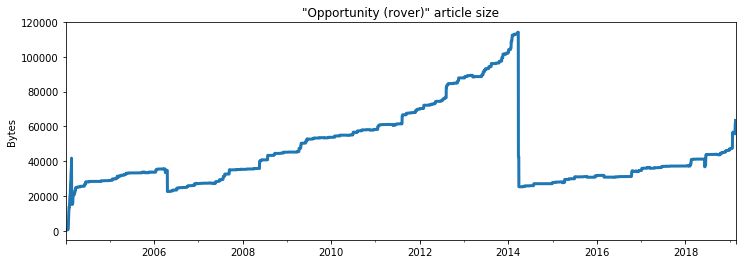

In [45]:
f,ax = plt.subplots(1,1,figsize=(12,4))

oppy_df['length'].plot(lw=3,ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Bytes')
ax.set_title('"Opportunity (rover)" article size');

Or the number of revisions.

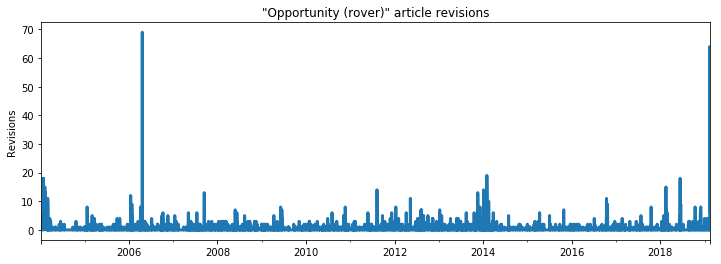

In [46]:
f,ax = plt.subplots(1,1,figsize=(12,4))

oppy_df['revisions'].plot(lw=3,ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Revisions')
ax.set_title('"Opportunity (rover)" article revisions');

Or which revision persisted for the most days.

In [47]:
oppy_df['last_revid'].value_counts().head(10)

6121465.0      70
662721610.0    46
849441768.0    41
108054149.0    40
307719081.0    39
813958778.0    31
634712889.0    30
255144298.0    29
16272706.0     29
3950967.0      28
Name: last_revid, dtype: int64